In [1]:
import pandas as pd
import json
from pandas.io.json import json_normalize
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline

# Data Exploration Notebook

## Loading Data

In [2]:
def read_json_as_dataframe(path): 
    with open(path) as f:
        data = json.load(f)
    return pd.DataFrame.from_dict(json_normalize(data), orient='columns')

In [3]:
neg_full = read_json_as_dataframe('negative_0-50k.json')

In [4]:
neu1 = read_json_as_dataframe('neutral_0-50k.json')
neu2 = read_json_as_dataframe('neutral_50k-100k.json')
neu3 = read_json_as_dataframe('neutral_100k-150k.json')
neu_full = pd.concat([neu1, neu2, neu3], ignore_index=True)

In [5]:
pos1 = read_json_as_dataframe('positive_0-50k.json')
pos2 = read_json_as_dataframe('positive_50k-100k.json')
pos_full = pd.concat([pos1, pos2], ignore_index=True)

/Users/Bai/anaconda2/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


### Standardize

In [6]:
neg = neg_full[['text', 'title', 'type', 'verification_date']]
neg['text'] = neg['title'].map(str) + ' ' + neg['text'].map(str)
neg.drop('title', axis=1, inplace=True)

/Users/Bai/anaconda2/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Bai/anaconda2/envs/python3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [7]:
neu = neu_full[['text', 'title', 'type', 'verification_date']]
neu['text'] = neu['title'].map(str) + ' ' + neu['text'].map(str)
neu.drop('title', axis=1, inplace=True)

/Users/Bai/anaconda2/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [8]:
pos = pos_full[['text', 'title', 'type', 'verification_date']]
pos['text'] = pos['title'].map(str) + ' ' + pos['text'].map(str)
pos.drop('title', axis=1, inplace=True)

/Users/Bai/anaconda2/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [9]:
neg.rename(columns={'verification_date': 'date'}, inplace=True)
neu.rename(columns={'verification_date': 'date'}, inplace=True)
pos.rename(columns={'verification_date': 'date'}, inplace=True)

/Users/Bai/anaconda2/envs/python3/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


### Drop Duplicates

In [10]:
neg.drop_duplicates(subset = 'text', inplace=True)
neu.drop_duplicates(subset = 'text', inplace=True)
pos.drop_duplicates(subset = 'text', inplace=True)

/Users/Bai/anaconda2/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/Bai/anaconda2/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Bai/anaconda2/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel packag

## Save Dataframes

In [11]:
neg.to_csv('../data/negative.csv')
neu.to_csv('../data/neutral.csv')
pos.to_csv('../data/positive.csv')

## Shapes of Classes

In [39]:
print('Negative texts shape : ', neg.shape)
print('Neutral texts shape : ', neu.shape)
print('Positive texts shape : ', pos.shape)

Negative texts shape :  (19974, 3)
Neutral texts shape :  (104261, 3)
Positive texts shape :  (43644, 3)


## Preview 

In [40]:
print('Negative first five texts:')
neg.head()

Negative first five texts:


,text,type,date
0,Секретная пресс-конференция ЕНПФ: отставки Аки...,article,2017-04-04 16:25:34.085
1,Почему суд продлил арест бывших руководителей ...,article,2017-04-03 11:08:48.359
2,"«Сумма премий работникам ""дочки"" МИР РК в 2014...",article,2017-04-24 11:56:37.938
3,Руководители крупных супермаркетов Алматы заяв...,article,2017-03-03 10:17:18.187
4,Экс-главе ЕНПФ Руслану Ерденаеву продлили арес...,article,2017-03-03 11:33:59.856


In [41]:
print('Neutral first five texts:') 
neu.head()

Neutral first five texts:


,text,type,date
0,В целях решения проблемных вопросов по прохожд...,post,2018-04-26 04:29:53.599
1,Дадим стране угля - мелкого и …. О нарастающих...,article,2017-02-10 12:39:49.721
2,АПК - новый драйвер экономики Наш корреспонден...,article,2017-02-01 06:44:36.652
3,Аким ЗКО пересел на новую машину за 56 млн тен...,article,2017-01-31 14:58:37.120
4,"Индекс KASE во вторник снизился на 0,1% до 149...",article,2017-02-01 19:39:35.008


In [42]:
print('Positive first five texts:')
pos.head()

Positive first five texts:


,text,type,date
0,В Караганде открыли завод по утилизации старых...,article,2017-07-26T12:54:57.454Z
1,«Завод по утилизации старых автомобилей достро...,article,2017-07-26T12:54:53.173Z
2,Внедорожник Toyota Fortuner будет продаваться ...,article,2017-07-28T04:20:20.138Z
3,Национальный день ЮАР прошел на ЭКСПО-2017 Поэ...,article,2017-07-20T07:11:02.249Z
4,Национальный день Королевства Испании на Экспо...,article,2017-07-20T07:12:10.490Z


## Media Type Ditribution

article    15081
post        4881
comment        8
video          4
Name: type, dtype: int64

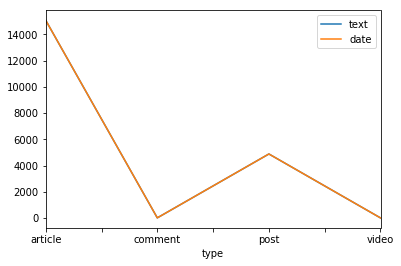

In [60]:
neg.groupby('type').count().plot()
neg.type.value_counts()

article    75667
post       28539
comment       31
video         22
tv             2
Name: type, dtype: int64

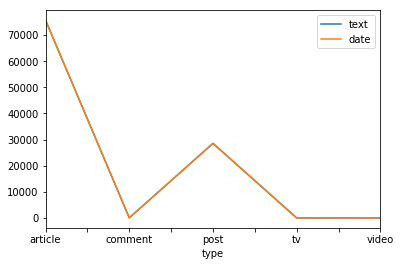

In [61]:
neu.groupby('type').count().plot()
neu.type.value_counts()

article    38447
post        5194
video          2
comment        1
Name: type, dtype: int64

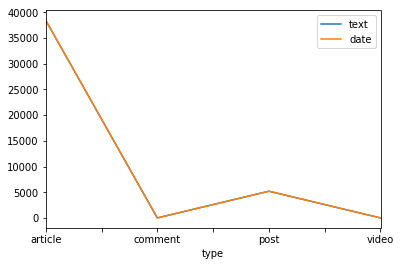

In [62]:
pos.groupby('type').count().plot()
pos.type.value_counts()

## Time Distribution

/Users/Bai/anaconda2/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


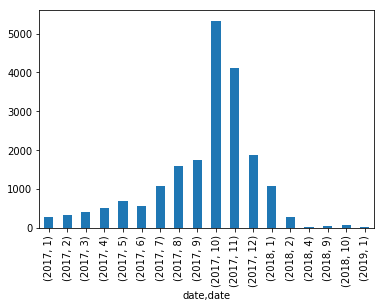

In [47]:
neg['date'] = neg['date'].astype("datetime64")
neg['date'].groupby([neg['date'].dt.year, neg['date'].dt.month]).count().plot(kind='bar')

/Users/Bai/anaconda2/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


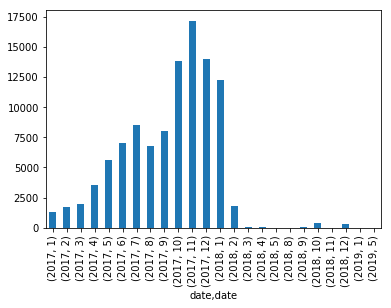

In [48]:
neu['date'] = neu['date'].astype("datetime64")
neu['date'].groupby([neu['date'].dt.year, neu['date'].dt.month]).count().plot(kind='bar')

/Users/Bai/anaconda2/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


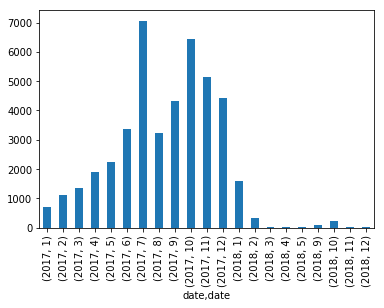

In [50]:
pos['date'] = pos['date'].astype("datetime64")
pos['date'].groupby([pos['date'].dt.year, pos['date'].dt.month]).count().plot(kind='bar')

##  Text Length and Word Count

### Negative

In [ ]:
neg['text_len'] = neg['text'].astype(str).apply(len)
neg['word_count'] = neg['text'].apply(lambda x: len(str(x).split()))

/Users/Bai/anaconda2/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/Bai/anaconda2/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


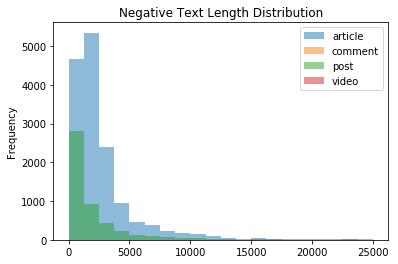

In [ ]:
neg.groupby('type').text_len.plot.hist(title='Negative Text Length Distribution', range=(0, 25000), bins=20, alpha=0.5)
plt.legend()

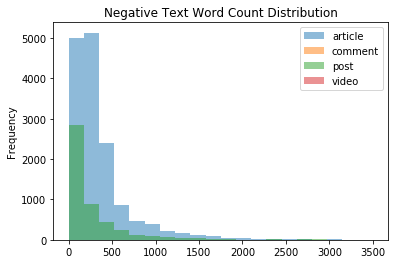

In [ ]:
neg.groupby('type').word_count.plot.hist(title='Negative Text Word Count Distribution', range=(0, 3500), bins=20, alpha=0.5)
plt.legend()

### Neutral

In [ ]:
neu['text_len'] = neu['text'].astype(str).apply(len)
neu['word_count'] = neu['text'].apply(lambda x: len(str(x).split()))

/Users/Bai/anaconda2/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/Bai/anaconda2/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


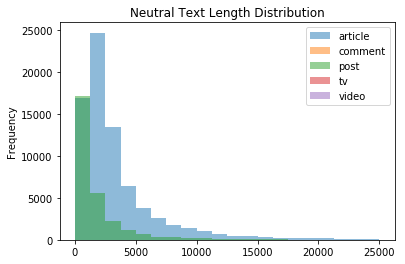

In [ ]:
neu.groupby('type').text_len.plot.hist(title='Neutral Text Length Distribution', range=(0, 25000), bins=20, alpha=0.5)
plt.legend()

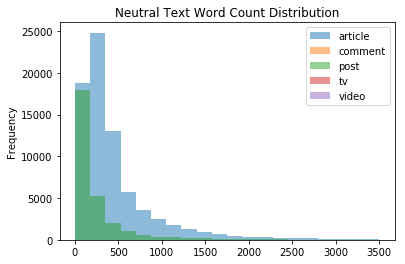

In [ ]:
neu.groupby('type').word_count.plot.hist(title='Neutral Text Word Count Distribution', range=(0, 3500), bins=20, alpha=0.5)
plt.legend()

### Positive

In [ ]:
pos['text_len'] = pos['text'].astype(str).apply(len)
pos['word_count'] = pos['text'].apply(lambda x: len(str(x).split()))

/Users/Bai/anaconda2/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/Bai/anaconda2/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


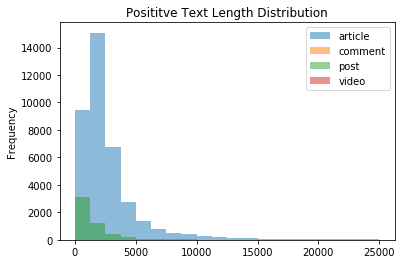

In [ ]:
pos.groupby('type').text_len.plot.hist(title='Posititve Text Length Distribution', range=(0, 25000), bins=20, alpha=0.5)
plt.legend()

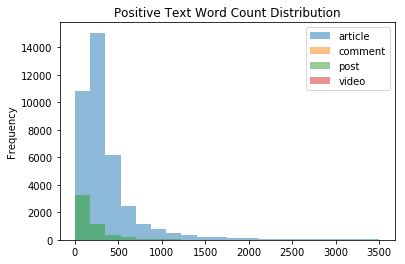

In [ ]:
pos.groupby('type').word_count.plot.hist(title='Positive Text Word Count Distribution', range=(0, 3500), bins=20, alpha=0.5)
plt.legend()

## Unigrams, Bigrams, Trigrams

### Unigrams

In [12]:
def get_top_n_words(corpus, n=None):
    russian_stopwords = stopwords.words("russian")
    russian_stopwords.append('это')
    vec = CountVectorizer(stop_words = russian_stopwords).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

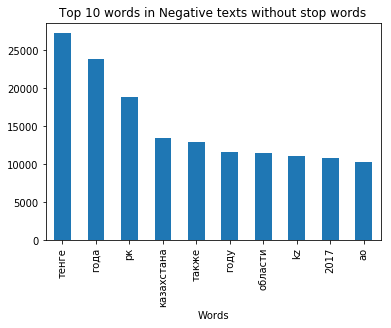

In [15]:
common_words = get_top_n_words(neg['text'], 10)
df = pd.DataFrame(common_words, columns = ['Words' , 'word_count'])
df.groupby('Words').sum()['word_count'].sort_values(ascending=False).plot.bar(
                    title='Top 10 words in Negative texts without stop words')

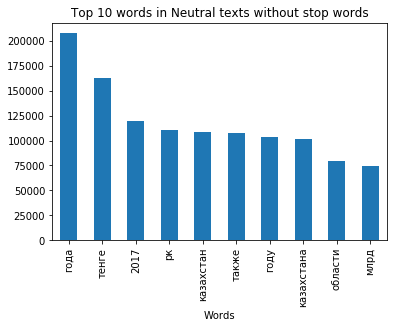

In [16]:
common_words = get_top_n_words(neu['text'], 10)
df = pd.DataFrame(common_words, columns = ['Words' , 'count'])
df.groupby('Words').sum()['count'].sort_values(ascending=False).plot.bar(
                    title='Top 10 words in Neutral texts without stop words')

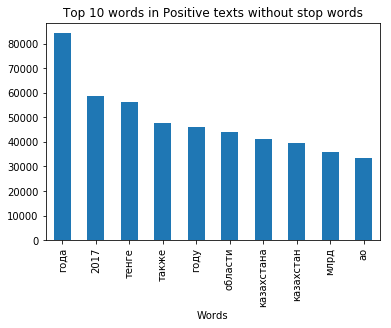

In [17]:
common_words = get_top_n_words(pos['text'], 10)
df = pd.DataFrame(common_words, columns = ['Words' , 'count'])
df.groupby('Words').sum()['count'].sort_values(ascending=False).plot.bar(
                    title='Top 10 words in Positive texts without stop words')

###  Bigrams

In [18]:
def get_top_n_bigram(corpus, n=None):
    russian_stopwords = stopwords.words("russian")
    russian_stopwords.append('это')
    vec = CountVectorizer(ngram_range=(2, 2), stop_words=russian_stopwords).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

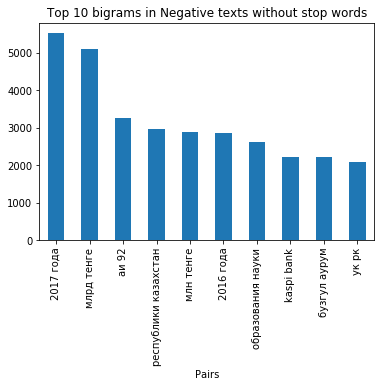

In [19]:
common_words = get_top_n_bigram(neg['text'], 10)
df = pd.DataFrame(common_words, columns = ['Pairs' , 'count'])
df.groupby('Pairs').sum()['count'].sort_values(ascending=False).plot.bar(
                    title='Top 10 bigrams in Negative texts without stop words')

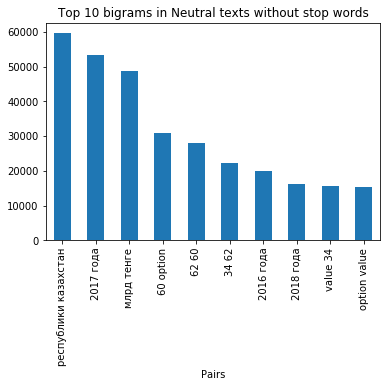

In [20]:
common_words = get_top_n_bigram(neu['text'], 10)
df = pd.DataFrame(common_words, columns = ['Pairs' , 'count'])
df.groupby('Pairs').sum()['count'].sort_values(ascending=False).plot.bar(
                    title='Top 10 bigrams in Neutral texts without stop words')

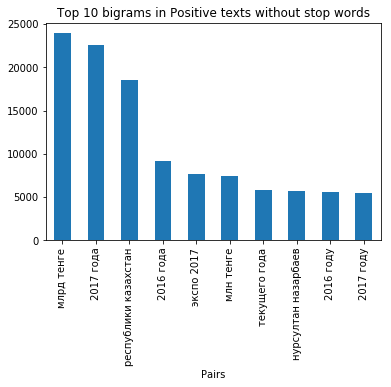

In [21]:
common_words = get_top_n_bigram(pos['text'], 10)
df = pd.DataFrame(common_words, columns = ['Pairs' , 'count'])
df.groupby('Pairs').sum()['count'].sort_values(ascending=False).plot.bar(
                    title='Top 10 bigrams in Positive texts without stop words')

###  Trigrams

In [22]:
def get_top_n_trigram(corpus, n=None):
    russian_stopwords = stopwords.words("russian")
    russian_stopwords.append('это')
    vec = CountVectorizer(ngram_range=(3, 3), stop_words=russian_stopwords).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

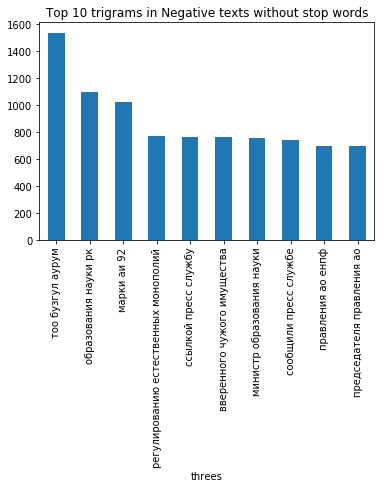

In [23]:
common_words = get_top_n_trigram(neg['text'], 10)
df = pd.DataFrame(common_words, columns = ['threes' , 'count'])
df.groupby('threes').sum()['count'].sort_values(ascending=False).plot.bar(
                    title='Top 10 trigrams in Negative texts without stop words')

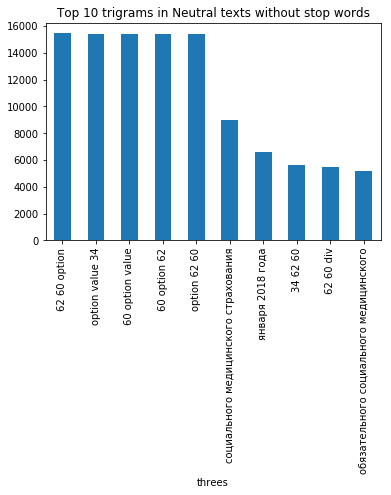

In [24]:
common_words = get_top_n_trigram(neu['text'], 10)
df = pd.DataFrame(common_words, columns = ['threes' , 'count'])
df.groupby('threes').sum()['count'].sort_values(ascending=False).plot.bar(
                    title='Top 10 trigrams in Neutral texts without stop words')

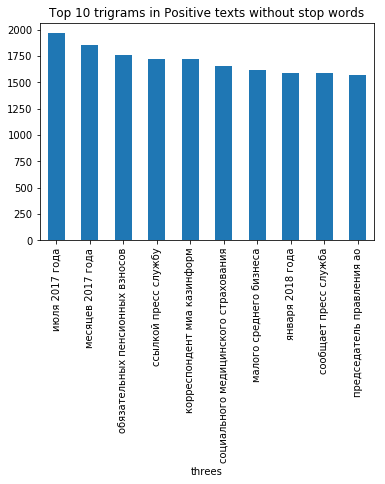

In [25]:
common_words = get_top_n_trigram(pos['text'], 10)
df = pd.DataFrame(common_words, columns = ['threes' , 'count'])
df.groupby('threes').sum()['count'].sort_values(ascending=False).plot.bar(
                    title='Top 10 trigrams in Positive texts without stop words')